In [1]:
import matplotlib.pyplot as plt
from brain import *

In [2]:
k = 1e2
n = int(1e4)
p = 0.1
b = 0.1
T = 10

In [3]:

mem = Memory(k, 2*n, p, b, T)
# concept, all_assemblies = mem.add_concept('Christos', num_engrams)
mem.add_concept('Christos+Brain', 0)

stim1 = Stimulus(k, 2*n, p, attribute='Christos+Brain')
stim1.weights[n:] = 0
stim2 = Stimulus(k, 2*n, p, attribute='Christos+Brain')
stim2.weights[:n] = 0
fiber1 = Fiber(2*n, p, b)
fiber1.connectome[n:, :] = 0
fiber1.connectome[:n, n:] = 0
fiber2 = Fiber(2*n, p, b)
fiber2.connectome[:n, :] = 0
fiber2.connectome[n:, :n] = 0

stim_combine = Stimulus(k, 2*n, p, attribute='Christos+Brain')
stim_combine.weights[:n] = stim1.weights[:n]
stim_combine.weights[n:] = stim2.weights[n:]
fiber_combine = Fiber(2*n, p, b)
fiber_combine.connectome[:n, :n] = fiber1.connectome[:n, :n]
fiber_combine.connectome[n:, n:] = fiber2.connectome[n:, n:]

asseb1, t1 = mem.stimulate_WM(stim1, fiber1, 200, until_converge=True)
asseb2, t2 = mem.stimulate_WM(stim2, fiber2, 200, until_converge=True)

print(len(np.intersect1d(asseb1, asseb2)))

import copy
time_step, inx1, inx2 = [], [], []
for t in range(10, 251, 10):
    mem_copy = copy.deepcopy(mem)
    stim_copy = copy.deepcopy(stim_combine)
    fiber_copy = copy.deepcopy(fiber_combine)

    final_asseb = mem_copy.stimulate_WM(stim_copy, fiber_copy, t)

    ints1 = len(np.intersect1d(asseb1, final_asseb))
    ints2 = len(np.intersect1d(asseb2, final_asseb))
    print(ints1, ints2)
    time_step.append(t)
    inx1.append(ints1)
    inx2.append(ints2)

0
1 3
4 2
4 0
4 2
2 2
5 2
5 1
3 3
5 2
4 1
3 3
3 5
4 2
4 1
5 2
4 3
5 4
3 1
3 1
7 4
2 3
4 4
2 2
3 5
3 3


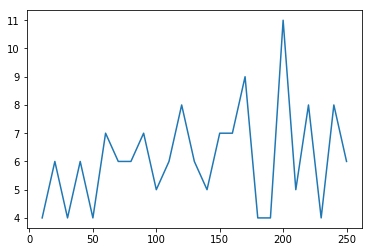

In [9]:
inx1 = np.array(inx1)
inx2 = np.array(inx2)
plt.plot(time_step, inx1+inx2)


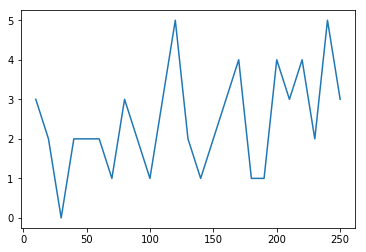

In [7]:
plt.plot(time_step, inx2)